<a href="https://colab.research.google.com/github/Existanze54/sirius-machine-learning-2024/blob/main/Seminars/Solutions/S6s_DimRed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основные методы ML

### Семинар 6: Методы понижения размерности. PCA. Batch-эффект и коррекция.

#### Визуализация транскриптомных данных. Анализ данных, выявление выбросов и батч-эффекта.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")

### Задача 1: Визуализация транскриптомных данных

В этой задаче предлагается загрузить транскриптомные данные и произвести снижение размерности методом PCA.

**Загрузите датасет** (`gse53625_expression.csv`) и метаданные к нему (`gse53625_metadata.csv`).

In [ ]:
!wget https://data.bioml.ru/htdocs/courses/bioml/classic_ml/unsupervised/dim_reduction/data/gse53625.tar.gz -O gse53625.tar.gz
!tar xvzf gse53625.tar.gz

--2024-11-16 13:01:27--  https://data.bioml.ru/htdocs/courses/bioml/classic_ml/unsupervised/dim_reduction/data/gse53625.tar.gz
Resolving data.bioml.ru (data.bioml.ru)... 188.120.231.217
Connecting to data.bioml.ru (data.bioml.ru)|188.120.231.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1666446 (1.6M) [application/x-gzip]
Saving to: ‘gse53625.tar.gz’

gse53625.tar.gz     100%[===================>]   1.59M  2.13MB/s    in 0.7s    

2024-11-16 13:01:29 (2.13 MB/s) - ‘gse53625.tar.gz’ saved [1666446/1666446]

data/gse53625_expression.csv
data/gse53625_metadata.csv


In [ ]:
escc = pd.read_csv("./data/gse53625_expression.csv", index_col=0)
escc_meta = pd.read_csv("./data/gse53625_metadata.csv", index_col=0)

In [ ]:
escc.head()

,GSM1296956,GSM1296957,GSM1296958,GSM1296959,GSM1296960,GSM1296961,GSM1296962,GSM1296963,GSM1296964,GSM1296965,...,GSM1297304,GSM1297305,GSM1297306,GSM1297307,GSM1297308,GSM1297309,GSM1297310,GSM1297311,GSM1297312,GSM1297313
gene,,,,,,,,,,,,,,,,,,,,,
89253,6.879,6.592,6.932,6.337,6.758,6.839,6.592,6.597,6.920,7.460,...,6.739,7.207,6.994,7.414,6.694,7.209,6.730,7.413,5.397,4.771
9622,5.809,7.015,7.177,7.086,7.168,7.262,6.209,6.239,5.873,5.988,...,6.835,6.991,7.450,6.582,6.643,6.997,7.010,6.860,7.699,7.838
13079,8.259,8.189,9.278,8.162,10.033,8.016,9.154,7.965,8.880,8.128,...,8.521,7.371,9.728,8.795,6.985,7.837,8.771,7.805,7.511,5.752
100371,12.485,12.897,11.922,13.491,12.565,13.326,12.933,13.299,12.799,13.257,...,13.330,13.792,12.975,12.994,11.857,12.859,12.128,13.637,12.171,12.516
38363,10.261,9.215,9.532,9.756,9.770,9.158,9.666,10.082,9.507,9.356,...,11.332,10.898,9.852,9.888,10.010,10.179,10.182,10.370,11.386,14.120


In [ ]:
escc_meta.head()

,Sample type,Patient ID,Dataset
GEO accession,,,
GSM1296956,cancer,ec302,GSE53622
GSM1296957,normal,ec302,GSE53622
GSM1296958,cancer,ec303,GSE53622
GSM1296959,normal,ec303,GSE53622
GSM1296960,cancer,ec305,GSE53622


In [ ]:
X = escc.values.T
y = escc_meta["Sample type"]

**Обучите модель** PCA с двумя компонентами.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

**Постройте диаграмму рассеяния** для первых двух компонент.

<Axes: xlabel='PC1', ylabel='PC2'>

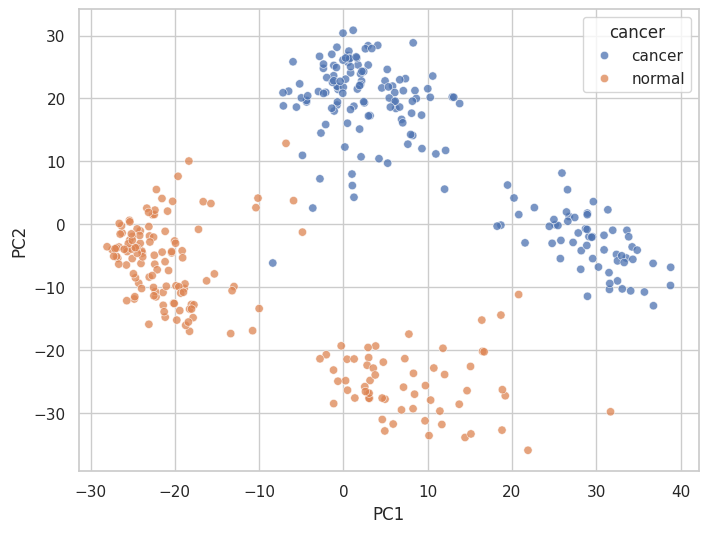

In [ ]:
df = pd.DataFrame({"PC1": X_pca[:,0],
                   "PC2": X_pca[:,1],
                   "cancer": y})
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="cancer", data=df, alpha=0.75)

**Какую долю дисперсии** объясняют найденные компоненты?

In [ ]:
total_explained = np.cumsum(pca.explained_variance_ratio_)
print(total_explained)

[0.17562213 0.32566366]


**Осуществите стандартизацию признаков** в выборке.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Произведите **обучение модели** PCA и **визуализацию**. Оцените долю объясняемой дисперсии.

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

<Axes: xlabel='PC1', ylabel='PC2'>

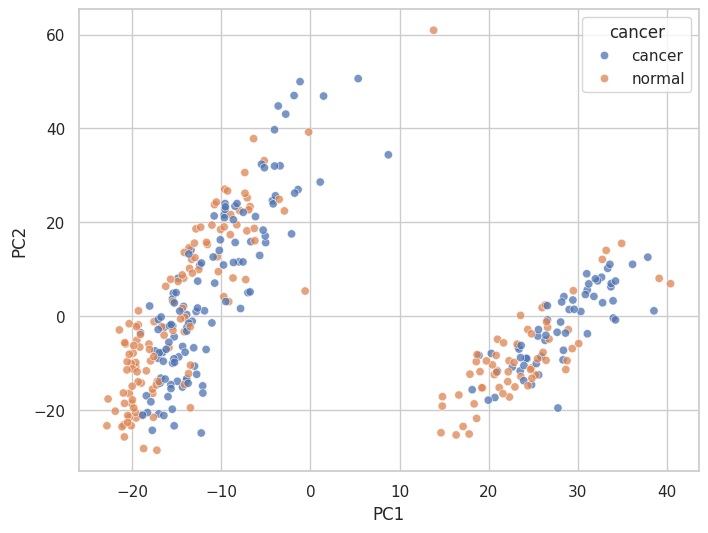

In [ ]:
df = pd.DataFrame({"PC1": X_pca[:,0],
                   "PC2": X_pca[:,1],
                   "cancer": y})
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="cancer", data=df, alpha=0.75)

**Какую долю дисперсии** объясняют найденные компоненты?

In [ ]:
total_explained = np.cumsum(pca.explained_variance_ratio_)
print(total_explained)

[0.18507792 0.31440548]


**Сделайте выводы**. Всегда ли стоит осуществлять нормализацию/стандартизацию транскриптомных данных?

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

<Axes: xlabel='PC2', ylabel='PC3'>

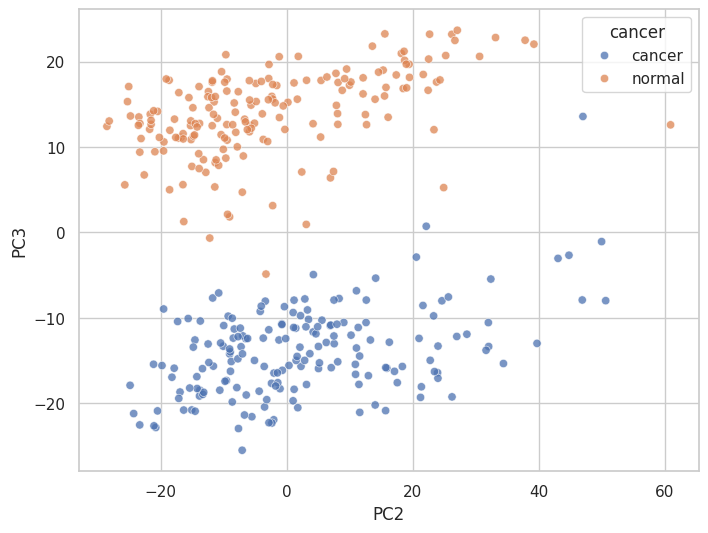

In [ ]:
df = pd.DataFrame({"PC2": X_pca[:,1],
                   "PC3": X_pca[:,2],
                   "cancer": y})
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC2", y="PC3", hue="cancer", data=df, alpha=0.75)

In [ ]:
# на семинаре получилась другая картинка, потому что автор по невнимательности обучил PCA на необработанных данных

#### Batch-эффект

Для неотмасштабированных данных и первых двух фичей после PCA должна была получиться картинка с 4 кластерами вместо двух. Попробуйте отметить на ней не только данные по классам, а также рахные типы датасетов (столбик `Dataset` в файле `gse53625_metadata.csv`)

In [ ]:
batch = escc_meta["Dataset"]

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

<Axes: xlabel='PC1', ylabel='PC2'>

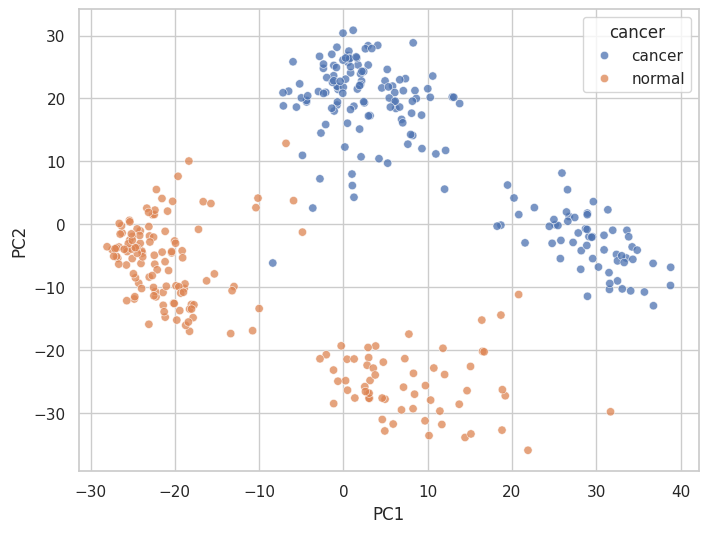

In [ ]:
df = pd.DataFrame({"PC1": X_pca[:,0],
                   "PC2": X_pca[:,1],
                   "cancer": y})
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="cancer", data=df, alpha=0.75)

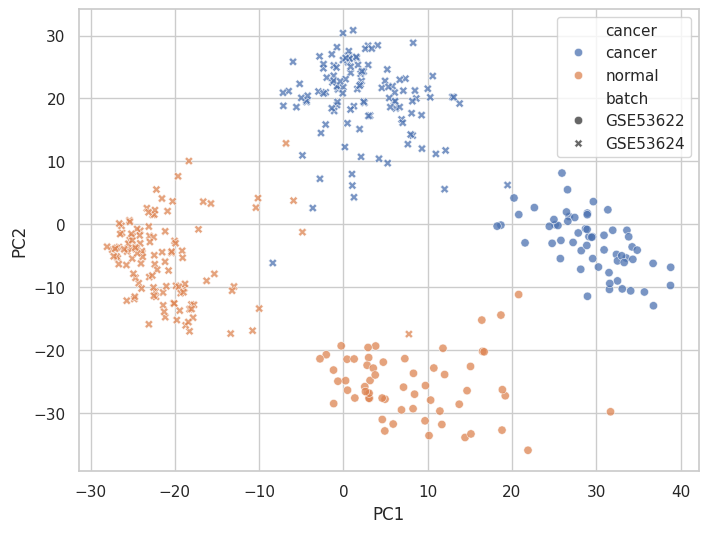

In [ ]:
df = pd.DataFrame({"PC1": X_pca[:,0],
                   "PC2": X_pca[:,1],
                   "cancer": y,
                   "batch": batch})
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="cancer", style="batch", data=df, alpha=0.75)
plt.show()

Сделайте **проверку изменений** для обычного **PCA по первым двум компонентам** на скорректированных данных

In [ ]:
!wget https://data.bioml.ru/htdocs/courses/bioml/classic_ml/unsupervised/dim_reduction/data/gse53625_expression_corrected.csv -O ./data/gse53625_expression_corrected.csv

--2024-11-16 13:01:43--  https://data.bioml.ru/htdocs/courses/bioml/classic_ml/unsupervised/dim_reduction/data/gse53625_expression_corrected.csv
Resolving data.bioml.ru (data.bioml.ru)... 188.120.231.217
Connecting to data.bioml.ru (data.bioml.ru)|188.120.231.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13134765 (13M) [text/csv]
Saving to: ‘./data/gse53625_expression_corrected.csv’

./data/gse53625_exp 100%[===================>]  12.53M  9.97MB/s    in 1.3s    

2024-11-16 13:01:45 (9.97 MB/s) - ‘./data/gse53625_expression_corrected.csv’ saved [13134765/13134765]



In [ ]:
escc_corrected = pd.read_csv("./data/gse53625_expression_corrected.csv", index_col=0)

In [ ]:
X_corrected = escc_corrected.values.T
y = escc_meta["Sample type"]
batch = escc_meta["Dataset"]

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_corrected)

<Axes: xlabel='PC1', ylabel='PC2'>

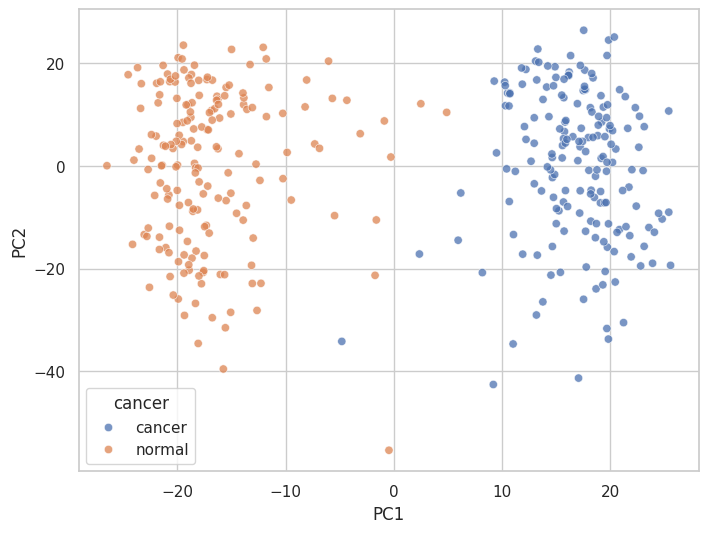

In [ ]:
df = pd.DataFrame({"PC1": X_pca[:,0],
                   "PC2": X_pca[:,1],
                   "cancer": y})
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="cancer", data=df, alpha=0.75)

### Задача 2: Загрузка транскриптомных данных. Исправление batch-эффекта.

В этой задаче предлагается воспользоваться пакетом [pyComBat](https://github.com/epigenelabs/pyComBat) для коррекции batch-эффекта в транскриптомных данных.

**Установите пакет pyComBat в окружение**. Для этого воспользуйтесь инструкцией на главной странице [репозитория pyComBat](https://github.com/epigenelabs/pyComBat) на GitHub.

In [ ]:
!pip install combat

  Preparing metadata (setup.py) ... done
  Created wheel for combat: filename=combat-0.3.3-py3-none-any.whl size=36782 sha256=1186ed79666df8c10eea0fa7adfa83be220e2b0aa67c244a269b5edb09256044
  Stored in directory: /root/.cache/pip/wheels/0d/e4/46/5c7b89d38f5160cf8f2fdda0a52c93439b6e7d9d661e8336f4
Successfully built combat


In [ ]:
# возможно потребуется перезапустить сессию Runtime -> Restart session

**Разберитесь, как осуществляется коррекция batch-эффекта** в pyComBat и осуществите коррекцию.

In [ ]:
from combat.pycombat import pycombat
escc_corrected = pycombat(escc, escc_meta['Dataset'])

Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


In [ ]:
escc.head()

,GSM1296956,GSM1296957,GSM1296958,GSM1296959,GSM1296960,GSM1296961,GSM1296962,GSM1296963,GSM1296964,GSM1296965,...,GSM1297304,GSM1297305,GSM1297306,GSM1297307,GSM1297308,GSM1297309,GSM1297310,GSM1297311,GSM1297312,GSM1297313
gene,,,,,,,,,,,,,,,,,,,,,
89253,6.879,6.592,6.932,6.337,6.758,6.839,6.592,6.597,6.920,7.460,...,6.739,7.207,6.994,7.414,6.694,7.209,6.730,7.413,5.397,4.771
9622,5.809,7.015,7.177,7.086,7.168,7.262,6.209,6.239,5.873,5.988,...,6.835,6.991,7.450,6.582,6.643,6.997,7.010,6.860,7.699,7.838
13079,8.259,8.189,9.278,8.162,10.033,8.016,9.154,7.965,8.880,8.128,...,8.521,7.371,9.728,8.795,6.985,7.837,8.771,7.805,7.511,5.752
100371,12.485,12.897,11.922,13.491,12.565,13.326,12.933,13.299,12.799,13.257,...,13.330,13.792,12.975,12.994,11.857,12.859,12.128,13.637,12.171,12.516
38363,10.261,9.215,9.532,9.756,9.770,9.158,9.666,10.082,9.507,9.356,...,11.332,10.898,9.852,9.888,10.010,10.179,10.182,10.370,11.386,14.120


In [ ]:
escc_corrected.head()

,GSM1296956,GSM1296957,GSM1296958,GSM1296959,GSM1296960,GSM1296961,GSM1296962,GSM1296963,GSM1296964,GSM1296965,...,GSM1297304,GSM1297305,GSM1297306,GSM1297307,GSM1297308,GSM1297309,GSM1297310,GSM1297311,GSM1297312,GSM1297313
gene,,,,,,,,,,,,,,,,,,,,,
89253,7.522620,7.179698,7.585947,6.875011,7.378043,7.474826,7.179698,7.185672,7.571609,8.216829,...,6.502023,6.940047,6.740690,7.133788,6.459905,6.941919,6.493599,7.132853,5.245979,4.660075
9622,6.067143,7.400217,7.579287,7.478698,7.569338,7.673243,6.509290,6.542451,6.137887,6.265004,...,6.681747,6.829143,7.262827,6.442701,6.500336,6.834812,6.847095,6.705368,7.498094,7.629427
13079,8.579172,8.490875,9.864529,8.456817,10.816878,8.272655,9.708116,8.208324,9.362496,8.413930,...,8.396696,7.377457,9.466454,8.639541,7.035347,7.790471,8.618270,7.762109,7.501538,5.942546
100371,12.505486,12.854631,12.028378,13.358009,12.573281,13.218182,12.885138,13.195301,12.771582,13.159709,...,13.283909,13.700581,12.963738,12.980874,11.955426,12.859119,12.199838,13.560788,12.238620,12.549771
38363,10.394745,9.340229,9.659810,9.885634,9.899748,9.282765,9.794901,10.214288,9.634607,9.482377,...,11.167140,10.773144,9.823558,9.856240,9.966994,10.120417,10.123140,10.293812,11.216163,13.698159


**Сохраните полученный результат в файл** `gse53625_expression_combat_corrected.csv`.

In [ ]:
escc_corrected.to_csv('./data/gse53625_expression_combat_corrected.csv')

### Задача 3: Снижение размерности после коррекции batch-эффекта

В этой задаче предлагается сравнить результаты снижения размерности до и после коррекции batch-эффекта в транскриптомных данных.

**Загрузите датасет** `gse53625_expression_corrected.csv`.

In [ ]:
X = escc_corrected.values.T

Произведите **обучение модели** PCA и **визуализацию**. Оцените долю объясняемой дисперсии.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

<Axes: xlabel='PC1', ylabel='PC2'>

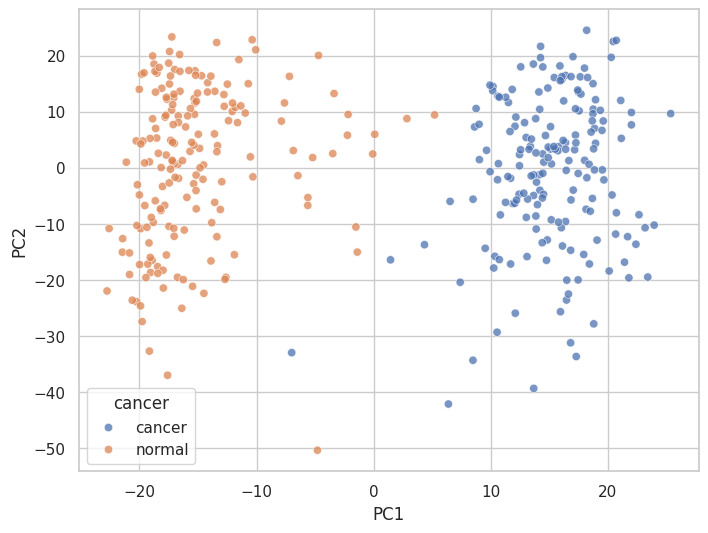

In [ ]:
df = pd.DataFrame({"PC1": X_pca[:,0],
                   "PC2": X_pca[:,1],
                   "cancer": y})
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="cancer", data=df, alpha=0.75)

In [ ]:
total_explained = np.cumsum(pca.explained_variance_ratio_)
print(total_explained)

[0.20000188 0.34724416]


Произведите **стандартизацию данных** и повторите предыдущий пункт.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

<Axes: xlabel='PC1', ylabel='PC2'>

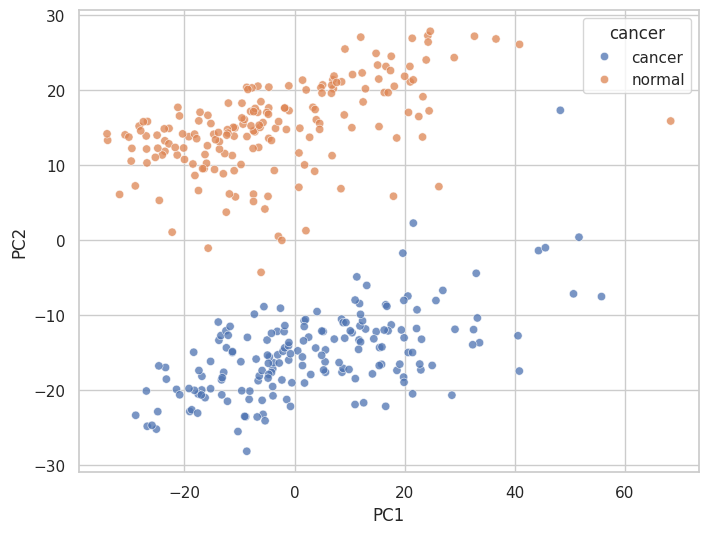

In [ ]:
df = pd.DataFrame({"PC1": X_pca[:,0],
                   "PC2": X_pca[:,1],
                   "cancer": y})
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="cancer", data=df, alpha=0.75)

In [ ]:
total_explained = np.cumsum(pca.explained_variance_ratio_)
print(total_explained)

[0.15412775 0.28454078]


**Сделайте выводы**.